# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

PCA:
By looking at the first five rows of the provided dataset, it appears the the feature with the most influence will be the same as the feature with the highest average spend and highest standard deviation, which in this case is the "Fresh" category. It appears, therefore, that the first PCA dimension will be most heavily influenced by the "Fresh" features.

ICA:
Intuitively, if ICA returns anything useful, it will return correlations between product segments and customer purchasing behavior. Whether those correltions be direct or inverse, it seems reasonable to assume that there could be a situation where purchasing behavior arises that has strong correlations between two or more product segments.



###PCA

Variance Ratio Contribution and Percent Increase By Component 
Component 1 - Variance Ratio Total: 45.961% | Percentage increase: inf%
Component 2 - Variance Ratio Total: 86.479% | Percentage increase: 88.155%
Component 3 - Variance Ratio Total: 93.482% | Percentage increase: 8.098%
Component 4 - Variance Ratio Total: 97.884% | Percentage increase: 4.709%
Component 5 - Variance Ratio Total: 99.386% | Percentage increase: 1.535%
Component 6 - Variance Ratio Total: 100.0% | Percentage increase: 0.618%


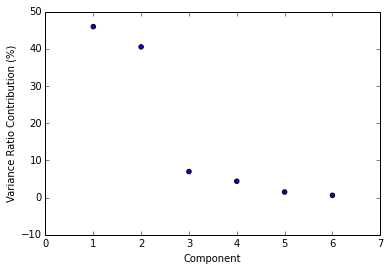

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


 #################### Biplot below ################# 


[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]


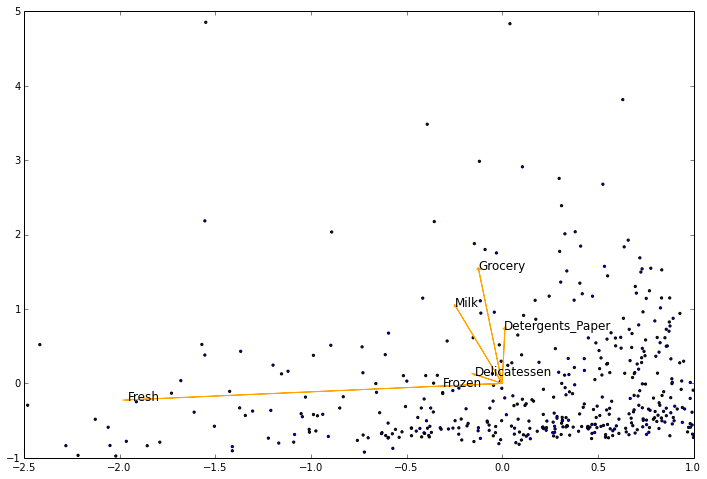

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset


from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(data)
comp_var = 0
i = 1
var_contribution = {}
print "Variance Ratio Contribution and Percent Increase By Component "
for variance in  pca.explained_variance_ratio_:
    prev_var = comp_var
    comp_var = comp_var+variance
    increase_per = round((comp_var-prev_var)/prev_var * 100,3)
    display_var = round(float(comp_var*100), 3)
    var_contribution[i] = variance*100
    print "Component " + str(i) + " - " + "Variance Ratio Total: " + str(display_var) + "% | Percentage increase: " + str(increase_per) + "%"
    i += 1

plt.scatter(var_contribution.keys(), var_contribution.values())
plt.xlabel('Component')
plt.ylabel('Variance Ratio Contribution (%)')
plt.show()
    
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_


print "\n\n #################### Biplot below ################# \n\n"

# Biplot function, see reference in answer to question 3


# Code snippet taken from Udacity Forums and modified, reference link below:
# https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/11
def pca_biplot(new_data):
    # Fit on 2 components
    pca2 = PCA(n_components=2, whiten=True).fit(new_data)
    print pca2.components_
    # Plot transformed/projected data
    format_data = pd.DataFrame(
        pca2.transform(new_data),
        columns=['PC1', 'PC2']
    )
    
    plt.figure(figsize=(12, 8))
    plt.scatter(format_data["PC1"], format_data["PC2"], marker='.')
    
    plt.xlim(-2.5,1.0)
    plt.ylim(-1.0,5)
    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca2.components_[0]*2, pca2.components_[1]*2)):
        plt.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        plt.annotate(new_data.columns[i], (pc1, pc2), size=12)
    plt.show()


pca_biplot(data)


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance contribution appears to be something of a step function with the majority of the contribution, 87.47% in total, coming from the first two dimensions. The next four dimensions have very small contributions that appear to be decreasing in a negative exponential fashion.

Depending upon tests for efficiency and increased accuracy, I would choose either 2 or 3 dimensions. After the third dimension each subsequent dimension contributes 3.8% or less to the total variance ratio.

Forced to pick one value without further testing, I would pick 2 dimensions, covering 86.47% of the total variance ratio.



**3)** What do the dimensions seem to represent? How can you use this information?

Answer: To answer this question I used one external resource

1) Udacity Forums - https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/11
This put me in the right direction to visualize the dimensions using the bi-plot above.

Using the statistics within the README file, the biplot confirms my initial hypothesis that the features with the highest standard deviation would be the largest contributors to PCA dimensions. In this case the first dimension appears to be the Fresh category while the second component is most heavily influenced by the Grocery category.

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
std_data = data
std_data /= std_data.std(axis=0)


# Print the independent components

In [4]:
i = 0
num_iter = 5
while i < num_iter:
    print"\n ######### ICA Analysis " + str(i+1) + " ########"
    ica = FastICA(n_components=6, whiten=True).fit(std_data)
    print np.round_(ica.components_*100, decimals=6)
    i= i+1



 ######### ICA Analysis 1 ########
[[  0.194639   7.265273  -5.525157  -0.176296   1.586453  -1.707713]
 [  0.488845   0.162037   0.569927   0.253463  -0.24278   -5.102195]
 [ -5.028679   0.635173   0.601708   0.328511  -0.991804   0.292899]
 [  0.377098  -1.7115   -11.431021   0.711011  13.445407   1.615672]
 [ -0.265229   1.385568  -6.157453  -0.196304   0.443185   0.417287]
 [  1.09414    0.103848  -0.735372  -5.41114    0.263967   1.678521]]

 ######### ICA Analysis 2 ########
[[ -1.094146  -0.103842   0.735424   5.411139  -0.264017  -1.678533]
 [  0.488834   0.162033   0.570043   0.253454  -0.242877  -5.102203]
 [ -5.028665   0.635149   0.601131   0.328531  -0.991227   0.292978]
 [  0.265239  -1.386325   6.155373   0.196456  -0.44047   -0.416821]
 [ -0.377239   1.711781  11.431914  -0.710991 -13.445419  -1.615834]
 [  0.194705   7.265065  -5.525671  -0.176234   1.58744   -1.707623]]

 ######### ICA Analysis 3 ########
[[ -5.03106    0.640045   0.698553   0.324959  -1.091255   0.2

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

The matrix is fairly inconsistent with components changing position on almost every run. For that reason It is difficult to describe each vector in order. For the purpose of this answer, I will refer to the first component matrix from my analysis. These vectors appear to remain consistent within themselves, but tend to change position within the overall matrix.

Vector 1: This vector shows a very strong anti-correlation between Grocery and Detergents_Paper.

Vector 2: This vector does not show strong correlations between any two vectors, rather it appears to describe the Deli category as being independent.

Vector 3: This vector shows a strong anti-correlation between the Milk and Grocery categories.

Vector 4: This vector shows an independence of the Fresh category, which incidentally, was also what PCA found, as the Fresh category dominated an entire component.

Vector 5: This vector shows an interesting anti-correlation between three components, on the negative side you have Frozen, while on the positive side there is the group of Deli and Fresh.

Vector 6: Similarly to vector 5, this vector shows a mild anti correlation between Grocery and the group composed of Detergents_paper and Milk.


A repeating pattern in this analysis is an inverse correlation between Grocery and Milk as that appeared in two vectors. Another interesting aspect of this analysis is that there were no strongly positive correlations. All strong correlations were inverse relationships.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 


K-Means clustering:
1) A general purpose algorithm that scales easily to large sets of data.
2) The run time of K-Means is linear, represented as the operation time times the number of objects O(n) 
3) K-Means provides "hard" breaks in clusters which isn't neccessarily an advantage or disadvantage.

Gaussian Mixture Model:
GMM operates by trying to find a given number of normally distributed groups. 

1) Is a soft clustering method which means that cluster boundaries can extend beyond or through other clusters.


References:
https://www.quora.com/What-are-the-pros-and-cons-of-kmeans-vs-hierarchical-clustering
https://en.wikipedia.org/wiki/Mixture_model


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [33]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [34]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2, whiten=True).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[-0.05066239  0.13161505]
 [ 0.34502287  0.33556674]
 [ 0.37738285  0.21406486]
 [-0.07718708 -0.5212911 ]
 [-0.83067886 -0.17928035]
 [ 0.2155776  -0.07967954]
 [ 0.05576966 -0.16710073]
 [ 0.34874672  0.11866355]
 [ 0.52313722 -0.18311407]
 [ 0.37595155  1.11903068]]


In [35]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

KM3clusters = KMeans(n_clusters=3).fit(reduced_data)
KM4clusters = KMeans(n_clusters=4).fit(reduced_data)
GM3clusters = GMM(n_components=3).fit(reduced_data)
GM4clusters = GMM(n_components=4).fit(reduced_data)


In [37]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
ZKM3 = KM3clusters.predict(np.c_[xx.ravel(), yy.ravel()])
ZKM4 = KM4clusters.predict(np.c_[xx.ravel(), yy.ravel()])
ZGM3 = GM3clusters.predict(np.c_[xx.ravel(), yy.ravel()])
ZGM4 = GM4clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [38]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroidsKM3 = KM3clusters.cluster_centers_
centroidsKM4 = KM4clusters.cluster_centers_
centroidsGM3 = GM3clusters.means_
centroidsGM4 = GM4clusters.means_
# centroids = clusters.cluster_centers_
print centroidsKM3
print centroidsKM4
print centroidsGM3
print centroidsGM4

[[ 0.32008986 -0.2630121 ]
 [-1.88774966 -0.36229652]
 [ 0.11668589  2.07512456]]
[[-1.88774966 -0.36229652]
 [ 0.28462928 -0.38947388]
 [-1.13306214  5.12306113]
 [ 0.43241451  1.11831115]]
[[ 0.55039413  0.37036156]
 [ 0.02064228 -0.53090193]
 [-1.41677388  0.86006388]]
[[ 0.17940537 -0.55282278]
 [ 0.5583185   0.45892011]
 [-1.22094426 -0.27637617]
 [-0.74403514  2.88180902]]


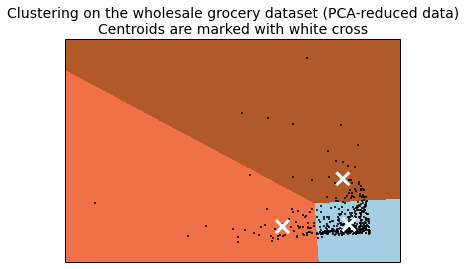

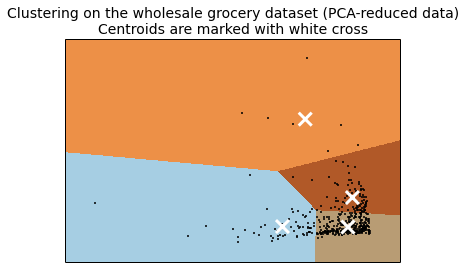

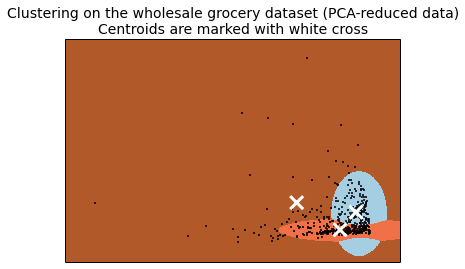

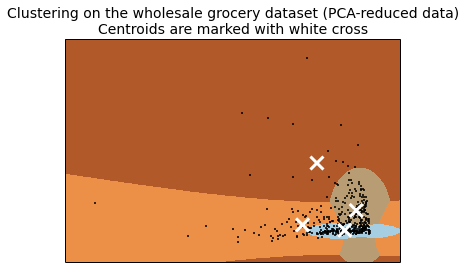

In [43]:
# Put the result into a color plot


#KM3
ZKM3 = ZKM3.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(ZKM3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroidsKM3[:, 0], centroidsKM3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
           'Centroids are marked with white cross', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


#KM4
ZKM4 = ZKM4.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(ZKM4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroidsKM4[:, 0], centroidsKM4[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
           'Centroids are marked with white cross', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


#GM3
ZGM3 = ZGM3.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(ZGM3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroidsGM3[:, 0], centroidsGM3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
           'Centroids are marked with white cross', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


#GM4
ZGM4 = ZGM4.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(ZGM4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3)
plt.scatter(centroidsGM4[:, 0], centroidsGM4[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
           'Centroids are marked with white cross', fontsize=14)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

I have generated four plots, two each for K-Means and GMM using 3 and 4 clusters. I believe that the easiest model to use in the context of creating customer segments is the GMM using 4 clusters. By observation, this has fairly accurately separated highly biased customers to either of the Principle Components, or less biased customers with mild tendancies toward one of the principle components.

Describing each cluster individually:

Blue) This is the customer segment which is very highly biased towards the principle component dominated by the Fresh category. This segment has very little correlation with the component dominated by the Grocery category.

Tan) This customer segment is much more highly correlated with the Grocery category. Interestingly this category is not as highly biased as the Fresh dominated segment, it shows more variance in the data thus describing a more broad customer segment.

Orange) This segment describes the much less biased customers that have some mild tendancy toward the Fresh dominated principle component. This cluster describes all of the fringe customers that do not fit in the highly biased Fresh segment.

Auburn) This segment is the opposite of the Orange cluster. This cluster describes the outlier customers that are generally more biased toward the Grocery component but do not fit in the highly correlated Grocery segment.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: The PCA analysis when combined with the bi-plot helped me visualize this data in the most significant way. Additionally it very clearly demonstrated and separated the data into two components for two dimensional clustering.

When compared with the ICA result, PCA provided a clear separation of categories into two components, ICA on the other hand, in six component vectors, did not create a clear pattern of separation between the six product categories to reduce the data to 2 dimensions effectively.

**9)** How would you use that technique to help the company design new experiments?

Answer:

One clear path forward arose from this analysis for me. The customer segment that is so highly biased toward the Fresh-dominant component needs to be treated as an independent customer group. This customer group has very little use for items in the Grocery dominant component. This leads to the conclusion that delivery time and warehouse inventory for these clients can be tailored to their specific buying habits. 

The experiment on this group of cutomers would be A/B testing on their buying habits. For the group of customers that received the more efficient, faster delivery, predicted by this analysis, does their spend and customer satisfaction rise? Alternatively, is there no change seen between the groups with tailored delivery and traditional delivery.



**10)** How would you use that data to help you predict future customer needs?

Answer: 

1) Using the four groups that arose from this analysis, increased granularity in terms of customer size in terms of annual spend within each group using similar methods used in this analysis could lead to a much deeper understanding of customer segments based on habits and volume.

2) This analysis could be used directly to classify new customers by placing them into a customer segment cluster predictively. 

3) Running this analysis regularly could be used to track drift of customers within their customer segment. This method could be used to predict that a customer will transition from one segment to another before it happens.
